In [24]:
# Load Libraries for Model
import numpy as np            
import pandas as pd                           
import seaborn as sns                     
import matplotlib.pyplot as plt          

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import tensorflow as tf
import keras  
from tensorflow.keras import models, losses, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping 


In [9]:
data = pd.read_pickle("mpg_cleaned.pkl")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    int64  
 4   weight         392 non-null    int64  
 5   acceleration   392 non-null    float64
 6   model_year     392 non-null    int64  
 7   origin         392 non-null    int64  
 8   car_name       392 non-null    object 
 9   car_maker      392 non-null    object 
 10  car_maker_num  392 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 36.8+ KB


In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_maker,car_maker_num
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,7
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,3
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,25
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,13


In [11]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name', 'car_maker',
       'car_maker_num'],
      dtype='object')

In [12]:
# Define X and y data for the model
X = data.drop(columns=['mpg', 'car_name','car_maker']).values
y = data["mpg"].values

In [18]:
# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaler Variable 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print Shape of dataframe

# Train Data Shape
print(f"X_train Shape: {X_train.shape}") 
print(f"y_train Shape: {y_train.shape}")

# Test Data Shape
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")


X_train Shape: (313, 8)
y_train Shape: (313,)
X_test Shape: (79, 8)
y_test Shape: (79,)


In [22]:
X_train.shape[1]

8

In [ ]:
# Build a Base Deep Learning - Regression Model
from tensorflow.keras import models, losses, optimizers, layers, Sequential

model = models.Sequential() # call sequential model from tensorflow
model.add(layers.Dense(units=128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(units=1, activation="linear"))

# Compile the Model
model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    batch_size=20,
                    epochs=200,
                    validation_data=(X_test,y_test),
                    verbose=0
                    )

c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Axes: xlabel='Epochs', ylabel='Loss'>

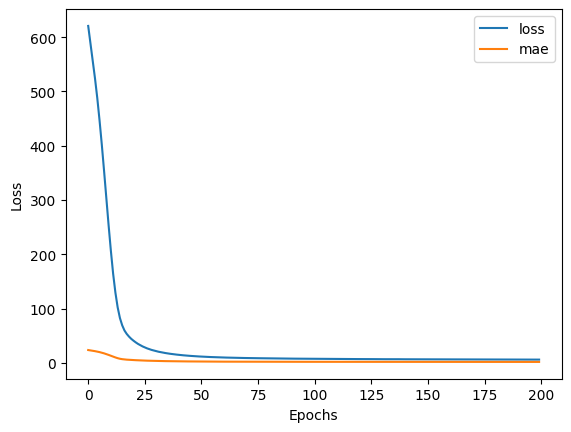

In [ ]:
rez = pd.DataFrame(model.history.history)
rez.plot(kind="line",
         xlabel="Epochs",
         ylabel=("Loss"))
plt.show()

In [41]:
results = model.evaluate(X_test, y_test)
loss, mae = results

print(f"Loss : {loss:.3}")
print(f"MAE : {mae:.3}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.8819 - mae: 1.6294
Loss : 5.88
MAE : 1.63


In [49]:
max(y_test)

np.float64(44.0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
{'MSE': 5.882, 'MAE': 1.629, 'R-squared': 0.885}


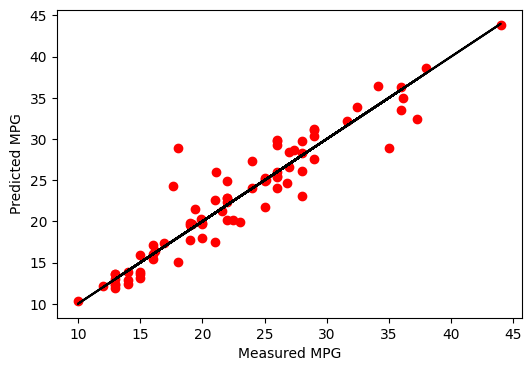

In [ ]:
# Make predictions 
y_predict = model.predict(X_test)
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.plot(y_test, y_test, color="black")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.text()
plt.show()

# Principal Component Analysis 🕷️✅

In [53]:
from sklearn.decomposition import PCA

In [ ]:
# Principal Componenet analysis
n_comp = 2
pipe = Pipeline([("scaler", StandardScaler()),
                 ("pca", PCA(n_components=n_comp))
                  ])
                
model = pipe.fit_transform(X)
pca_data = pd.DataFrame(model, columns=["PC1", "PC2"])

In [103]:
# data.head()

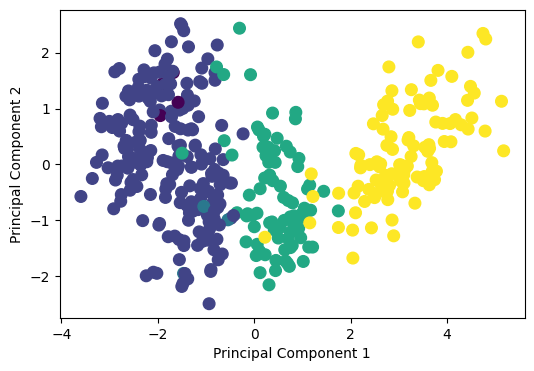

In [108]:
plt.figure(figsize=(6,4))
plt.scatter(pca_data["PC1"], pca_data["PC2"],
            c=data["cylinders"],
            s=70)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.legend(legend="cylinders")
plt.show()


In [101]:
pca_data = pca_data.reset_index(drop=True)
data = data.reset_index(drop=True)

for cylinder in data["cylinders"].unique():
    pcc = pca_data[data["cylinders"] == cylinder]
print(pcc)

          PC1       PC2
272 -0.545523 -0.995136
295 -1.046635 -0.754838
325 -1.466434 -1.955597


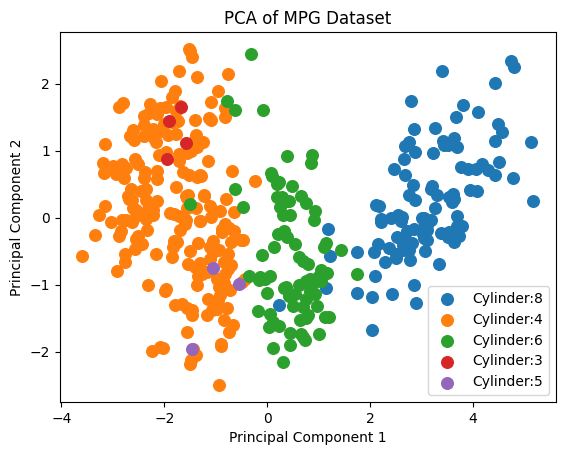

In [107]:
pca_data = pca_data.reset_index(drop=True)
data = data.reset_index(drop=True)

for cylinder in data["cylinders"].unique():
    
    sub_data = pca_data[data["cylinders"] == cylinder]
    plt.scatter(sub_data["PC1"], sub_data["PC2"],
                label=f"Cylinder:{cylinder}",
                s=70)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of MPG Dataset")
plt.legend()
plt.show()
    

# Introduce the Bull 🐂

In [110]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold

In [ ]:
"""xGBOOST Hyperparameters:

"""
base_estimator = XGBRegressor()

params = {"learning_rate":[0,1,10],
          "max_depth":[1,3,10],
          "subsample":[10,20,70],
          "colsample_bytree":[1,10,15],
        }

cv = KFold(n_splits=10, random_state=42)

grid_search = RandomizedSearchCV(estimator=base_estimator,
                                param_distributions= params,
                                scoring="neg_mean_squared_error",
                                cv = cv,
                                n_iter=10,
                                n_jobs=0,
                                random_state=42,
                                verbose=0
                                )

grid_search.fit(X_train, y_train)


In [111]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from xgboost import XGBRegressor

# Base model
base_estimator = XGBRegressor(objective="reg:squarederror", random_state=42)

# Parameter space
params = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.5, 0.7, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.9, 1.0],
    "n_estimators": [100, 300, 500]
}

# CV strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Randomized search
grid_search = RandomizedSearchCV(
    estimator=base_estimator,
    param_distributions=params,
    scoring="neg_root_mean_squared_error",  
    cv=cv,
    n_iter=20,       
    n_jobs=-1,       
    random_state=42,
    verbose=1
)

# Fit search
grid_search.fit(X_train, y_train)

# Best parameters & score
print("Best Params:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Params: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
Best Score: 2.752420284737403


{'MSE': 5.723, 'MAE': 1.751, 'R-squared': 0.888}


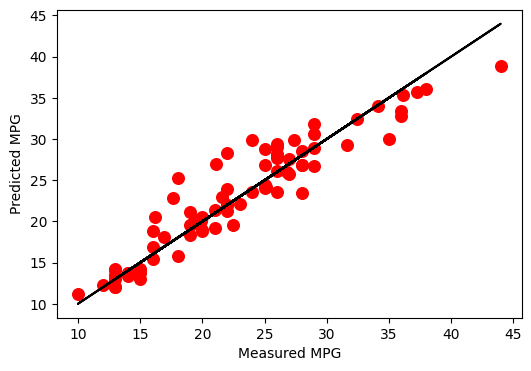

In [113]:
# Make predictions 
y_predict = grid_search.predict(X_test)
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red", s =70)
plt.plot(y_test, y_test, color="black")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()

In [ ]:
# Deep learning results
deep_learning_model_results = {'MSE': 5.882, 
                               'MAE': 1.629, 
                               'R-squared': 0.885}


# XGBOOST model results
xgboost_model_results = {'MSE': 5.723, 
                         'MAE': 1.751, 
                         'R-squared': 0.888}